In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lmuns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [199]:
emails = pd.read_csv("parsed_emails.csv")
emails = emails
emails


,Unnamed: 0,from,subject,bcc,date,cc,to,body
0,297136,customercare@match.com,CC: Match.com - You've Got Mail: Hello,NaN,"Thu, 13 Dec 2001 16:35:36 -0800",NaN,plucci@enron.com,This is a copy of your message sent to HelloI...
1,150805,pete.davis@enron.com,Start Date: 4/19/01; HourAhead hour: 13; <COD...,NaN,"Thu, 19 Apr 2001 05:41:00 -0700","bert.meyers@enron.com, bill.williams.III@enron...",pete.davis@enron.com,detectedSchedules2001041913txt Ener...
2,398632,richard.sanders@enron.com,"Re: Haley v. Exxon, McCall v. Exxon",NaN,"Mon, 13 Dec 1999 07:12:00 -0800",NaN,britt.davis@enron.com,Looks good Why does Jim McCartney think so
3,186159,tana.jones@enron.com,Credit Approvals,NaN,"Tue, 07 Dec 1999 05:09:00 -0800",NaN,"alan.aronowitz@enron.com, jeffrey.hodge@enron....",counterparties below for review are under th...
4,1486,annualconference@prosrm.com,Announcing Energy Profit Optimization Seminar ...,NaN,"Tue, 20 Nov 2001 16:53:42 -0800",NaN,k..allen@enron.com,FOR IMMEDIATE RELEASEPROS Revenue Management A...
...,...,...,...,...,...,...,...,...
9995,117001,susan.scott@enron.com,Re: gouging,NaN,"Tue, 21 Nov 2000 02:08:00 -0800",Kathy Ringblom,drew.fossum@enron.com,I know there is some case law out there on con...
9996,33727,steve.january@enron.com,RE: Draft - For Your Review,NaN,"Mon, 19 Nov 2001 14:56:22 -0800",NaN,"shelley.corman@enron.com, mike.bryant@enron.co...",think it looks good sjOriginal Message
9997,204518,vince.kaminski@enron.com,Btu Weekly,NaN,"Tue, 16 Jan 2001 05:39:00 -0800",NaN,vkaminski@aol.com,Forwarded by Vince J KaminskiHOUECT on 011620...
9998,453308,jbennett@gmssr.com,FW: Joint ACR Regarding DWR's Revenue Requirem...,NaN,"Wed, 25 Jul 2001 09:59:15 -0700",NaN,"harry.kingerski@enron.com, e-mail <.jeff@enron...",email WorkshopAttached is an Assigned Commiss...


In [200]:
emails

,Unnamed: 0,from,subject,bcc,date,cc,to,body
0,297136,customercare@match.com,CC: Match.com - You've Got Mail: Hello,NaN,"Thu, 13 Dec 2001 16:35:36 -0800",NaN,plucci@enron.com,This is a copy of your message sent to HelloI...
1,150805,pete.davis@enron.com,Start Date: 4/19/01; HourAhead hour: 13; <COD...,NaN,"Thu, 19 Apr 2001 05:41:00 -0700","bert.meyers@enron.com, bill.williams.III@enron...",pete.davis@enron.com,detectedSchedules2001041913txt Ener...
2,398632,richard.sanders@enron.com,"Re: Haley v. Exxon, McCall v. Exxon",NaN,"Mon, 13 Dec 1999 07:12:00 -0800",NaN,britt.davis@enron.com,Looks good Why does Jim McCartney think so
3,186159,tana.jones@enron.com,Credit Approvals,NaN,"Tue, 07 Dec 1999 05:09:00 -0800",NaN,"alan.aronowitz@enron.com, jeffrey.hodge@enron....",counterparties below for review are under th...
4,1486,annualconference@prosrm.com,Announcing Energy Profit Optimization Seminar ...,NaN,"Tue, 20 Nov 2001 16:53:42 -0800",NaN,k..allen@enron.com,FOR IMMEDIATE RELEASEPROS Revenue Management A...
...,...,...,...,...,...,...,...,...
9995,117001,susan.scott@enron.com,Re: gouging,NaN,"Tue, 21 Nov 2000 02:08:00 -0800",Kathy Ringblom,drew.fossum@enron.com,I know there is some case law out there on con...
9996,33727,steve.january@enron.com,RE: Draft - For Your Review,NaN,"Mon, 19 Nov 2001 14:56:22 -0800",NaN,"shelley.corman@enron.com, mike.bryant@enron.co...",think it looks good sjOriginal Message
9997,204518,vince.kaminski@enron.com,Btu Weekly,NaN,"Tue, 16 Jan 2001 05:39:00 -0800",NaN,vkaminski@aol.com,Forwarded by Vince J KaminskiHOUECT on 011620...
9998,453308,jbennett@gmssr.com,FW: Joint ACR Regarding DWR's Revenue Requirem...,NaN,"Wed, 25 Jul 2001 09:59:15 -0700",NaN,"harry.kingerski@enron.com, e-mail <.jeff@enron...",email WorkshopAttached is an Assigned Commiss...


In [201]:
tokens = word_tokenize(emails['body'].to_string().lower())
nltk.download('stopwords')
tokens

stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words and w.isalpha()]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lmuns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


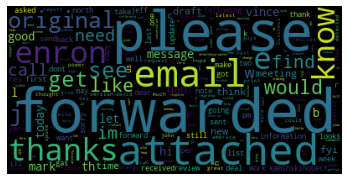

<Figure size 14400x14400 with 0 Axes>

In [202]:
porter = PorterStemmer()
stems = []
for t in tokens: 
    stems.append(porter.stem(t))

frequency_dist = nltk.FreqDist(tokens)
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(200,200))
plt.show()


In [203]:
vectorizer = TfidfVectorizer(analyzer='word',stop_words='english', max_df=0.5)

emails.drop(columns=['cc','bcc'], inplace=True)
emails.dropna(inplace=True)
emails['body']

0       This is a copy of your message sent to  HelloI...
1                  detectedSchedules2001041913txt Ener...
2              Looks good Why does Jim McCartney think so
3         counterparties below for review are under th...
4       FOR IMMEDIATE RELEASEPROS Revenue Management A...
                              ...                        
9995    I know there is some case law out there on con...
9996               think it looks good sjOriginal Message
9997     Forwarded by Vince J KaminskiHOUECT on 011620...
9998    email  WorkshopAttached is an Assigned Commiss...
9999    My apologies but as you can imagine California...
Name: body, Length: 9102, dtype: object

In [204]:
vectors = vectorizer.fit_transform(emails['body'].values)
vectors.shape
tfidf_tokens = vectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = vectors.toarray(),columns = tfidf_tokens)
df_tfidfvect

,00,000,0000,000000,00000000he,0000108729department,00005,0000639675,00008,00009,...,zuriff,zurita,zusaetzlich,zwabic,zwinger,zwischen,zxd414ppt,zydeco,zzfrom,zzy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
kmeans = KMeans(n_clusters=2, random_state=101, max_iter=100)
y_pred = kmeans.fit_predict(vectors)


In [192]:
#takings sparse matrix and making 2 dimentional coords

X_dense = vectors.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = pca.transform(X_dense)

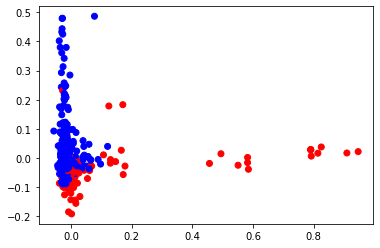

In [193]:
label_colors = ["blue", "red", "#000000"]
colors = [label_colors[i] for i in y_pred]
plt.scatter(coords[:,0], coords[:,1], c=colors)

In [206]:
#now lets try to do something actually useful. 
#so we want to get the Tf-IDF scores for all the emails and flag users if they often use unusually rare language. 

emails['predictions'] = y_pred
fraudsters_maybe = emails[emails['predictions'] == 1]

# this gets a list of emails that use strange or atypical language to the normal emails sent in this corpus. This list is a good starting point for having a human review these emails to 
# see if they are suspicious. 
#the labels can be thought of as 'suspicous' and 'not suspicous' 
fraudsters_maybe

,Unnamed: 0,from,subject,date,to,body,predictions
35,307536,kay.mann@enron.com,RE: Enron/Delta Turbine Acquisition,"Fri, 06 Apr 2001 08:27:00 -0700","ccampbell@kslaw.com, jkeffer@kslaw.com",PM Okay My exit strategy didnt work and I got...,1
37,311627,ccampbell@kslaw.com,ENA / Coral Turbine Transaction,"Mon, 11 Dec 2000 02:53:00 -0800","gkutzschbach@fulbright.com, areynaud@coral-ene...",2RM3REDDOC 2RLSREDDOC 2R6KREDDOC1 Revised...,1
107,75361,cvavrek@deloitte.com,RE: RE: FIA presentation,"Tue, 24 Apr 2001 09:36:00 -0700","mark_guinney@watsonwyatt.com, jeff.dasovich@en...",I can meet anytime anywhere tomorrow ALTHOUGH ...,1
133,319175,kay.mann@enron.com,Re: NRG Confidentiality Agreement,"Tue, 19 Dec 2000 08:47:00 -0800","fred.mitro@enron.com, rebecca.walker@enron.com",PM Jim has signed the CA Im planning on send...,1
167,411320,craig_vinson@cmicro.com,RE: My love.,"Fri, 01 Feb 2002 12:20:29 -0800",cara.semperger@enron.com,You are so cute Sheetsheemi That was a good on...,1
...,...,...,...,...,...,...,...
9969,508701,j.slechta@pecorp.com,May Pipeline Capacity for Peoples and North Shore,"Mon, 23 Apr 2001 08:21:52 -0700",jason.williams@enron.com,JasonAttached are the May 2001 pipeline capaci...,1
9970,293285,phillip.love@enron.com,Re: Thoughts,"Thu, 01 Feb 2001 02:29:00 -0800",rachel.bonilla-kragel@accenture.com,Thanks for the thoughts Sorry it has taken me...,1
9979,509474,greg_knudtson@enron.net,"RE: Available Opportunity - July 20, 2001 (Wes...","Thu, 26 Jul 2001 13:09:13 -0700",amy.fitzpatrick@enron.com,OnlineThis email is the property of Enron Corp...,1
9982,385933,linda.simmons@enron.com,RE: Draft Credit Annex,"Fri, 25 May 2001 06:38:00 -0700",william.bradford@enron.com,SENT ON BEHALF OF JANET MOOREPer my voice sor...,1


In [207]:
#now we can take these labels (0 and 1) and apply that to our data using a machine learning algo like K-nearest neighbors. 

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X =  vectors
y = y_pred

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

#it is likely that this model just filters for replies and forwarded messages. 

0.9925307557117751

In [211]:
predictions = clf.predict(X)

In [213]:
emails['predictions'] = predictions
emails[emails['predictions'] == 1]

,Unnamed: 0,from,subject,date,to,body,predictions
35,307536,kay.mann@enron.com,RE: Enron/Delta Turbine Acquisition,"Fri, 06 Apr 2001 08:27:00 -0700","ccampbell@kslaw.com, jkeffer@kslaw.com",PM Okay My exit strategy didnt work and I got...,1
37,311627,ccampbell@kslaw.com,ENA / Coral Turbine Transaction,"Mon, 11 Dec 2000 02:53:00 -0800","gkutzschbach@fulbright.com, areynaud@coral-ene...",2RM3REDDOC 2RLSREDDOC 2R6KREDDOC1 Revised...,1
133,319175,kay.mann@enron.com,Re: NRG Confidentiality Agreement,"Tue, 19 Dec 2000 08:47:00 -0800","fred.mitro@enron.com, rebecca.walker@enron.com",PM Jim has signed the CA Im planning on send...,1
167,411320,craig_vinson@cmicro.com,RE: My love.,"Fri, 01 Feb 2002 12:20:29 -0800",cara.semperger@enron.com,You are so cute Sheetsheemi That was a good on...,1
258,376901,benjamin.rogers@enron.com,Allegheny Environmental Schedule Questions,"Wed, 25 Oct 2000 10:02:00 -0700",don.miller@enron.com,Forwarded by Benjamin RogersHOUECT on Willia...,1
...,...,...,...,...,...,...,...
9969,508701,j.slechta@pecorp.com,May Pipeline Capacity for Peoples and North Shore,"Mon, 23 Apr 2001 08:21:52 -0700",jason.williams@enron.com,JasonAttached are the May 2001 pipeline capaci...,1
9970,293285,phillip.love@enron.com,Re: Thoughts,"Thu, 01 Feb 2001 02:29:00 -0800",rachel.bonilla-kragel@accenture.com,Thanks for the thoughts Sorry it has taken me...,1
9979,509474,greg_knudtson@enron.net,"RE: Available Opportunity - July 20, 2001 (Wes...","Thu, 26 Jul 2001 13:09:13 -0700",amy.fitzpatrick@enron.com,OnlineThis email is the property of Enron Corp...,1
9982,385933,linda.simmons@enron.com,RE: Draft Credit Annex,"Fri, 25 May 2001 06:38:00 -0700",william.bradford@enron.com,SENT ON BEHALF OF JANET MOOREPer my voice sor...,1
